In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sukamal/ML 4-6/cars.csv")

In [ ]:
# EDA - Exploratory Data Analysis - Explore, analyze and understand the data
# Preprocessing - cleaning the data, handling missing values, outliers, skewness etc.

In [ ]:
df.shape

(205, 15)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [ ]:
df.isnull().sum()
# NaN

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [ ]:
for val in df["horsepower"]:
  if not str(val).isnumeric():
      print(val)  

?
?


In [ ]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype("float64") 

In [ ]:
df["normalized-losses"].fillna(df["normalized-losses"].mean(), inplace=True)

In [ ]:
df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"] = df["horsepower"].astype("float64") 
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)

In [ ]:
# Split categorical and numerical datatypes
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [ ]:
# Numerical data

In [ ]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [ ]:
df_num.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [ ]:
# Outliers

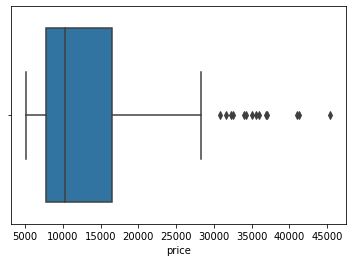

In [ ]:
#boxplot
sns.boxplot(data=df_num, x="price")

In [ ]:
q1 = np.quantile(df_num["price"], 0.25)
q2 = np.quantile(df_num["price"], 0.50)
q3 = np.quantile(df_num["price"], 0.75)

In [ ]:
print(q1,q2,q3)

7788.0 10345.0 16500.0


In [ ]:
iqr = q3 - q1
uw = q3 + 1.5*iqr
lw = q1 - 1.5*iqr

In [ ]:
print(uw,lw)

29568.0 -5280.0


In [ ]:
df_num[df_num["price"] > uw]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
15,0,122.0,66.9,55.7,209,182.0,16,22,30760
16,0,122.0,67.9,53.7,209,182.0,16,22,41315
17,0,122.0,70.9,56.3,209,182.0,15,20,36880
47,0,145.0,69.6,52.8,258,176.0,15,19,32250
48,0,122.0,69.6,52.8,258,176.0,15,19,35550
49,0,122.0,70.6,47.8,326,262.0,13,17,36000
70,-1,93.0,71.7,56.3,183,123.0,22,25,31600
71,-1,122.0,71.7,56.5,234,155.0,16,18,34184
72,3,142.0,70.5,50.8,234,155.0,16,18,35056
73,0,122.0,71.7,56.7,308,184.0,14,16,40960


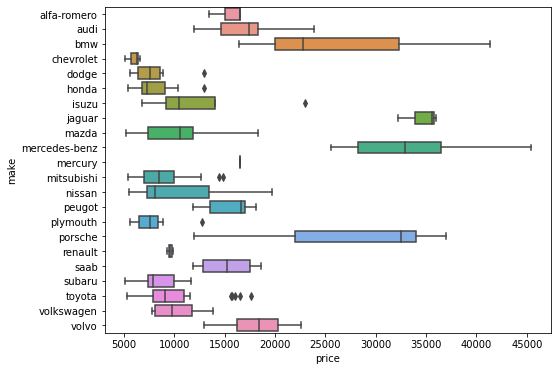

In [ ]:
# Bivariate analysis
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="price", y="make")
plt.show()

In [ ]:
df[(df["make"] == "isuzu") & (df["price"] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [ ]:
df_num.drop(45, inplace=True)
df_cat.drop(45, inplace=True)
df.drop(45, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df[(df["make"] == "plymouth") & (df["price"] > 11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [ ]:
df_num.drop(124, inplace=True)
df_cat.drop(124, inplace=True)
df.drop(124, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


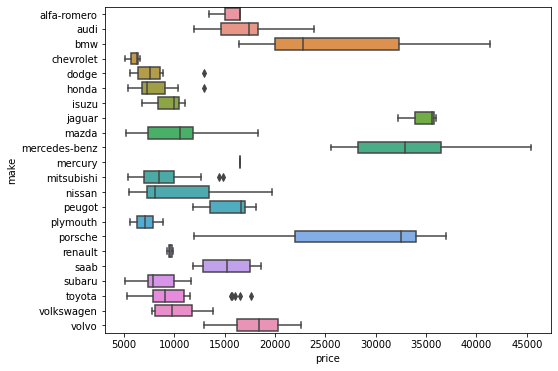

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="price", y="make")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from scipy.stats import skew

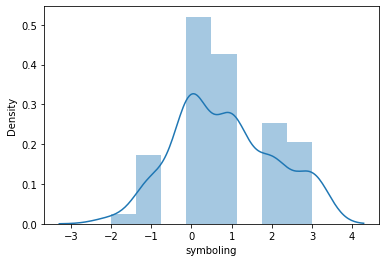

symboling 0.20496147298318457


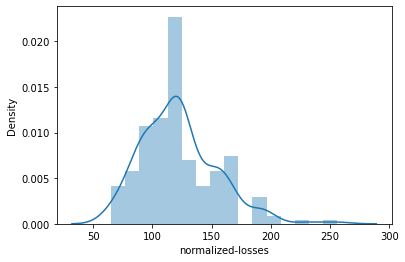

normalized-losses 0.8443855299694787


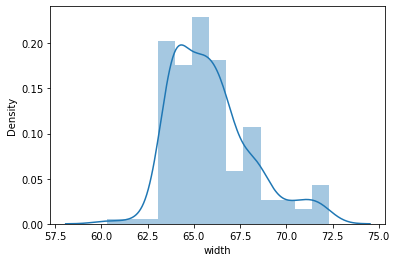

width 0.8937983893148324


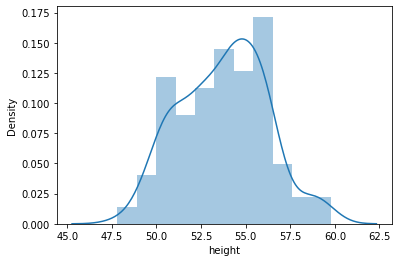

height 0.04840569764935829


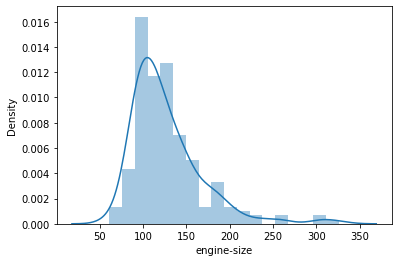

engine-size 1.9410595463554827


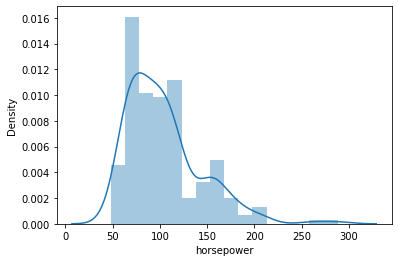

horsepower 1.3995855878312282


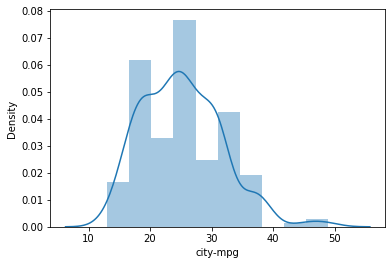

city-mpg 0.6606215321859762


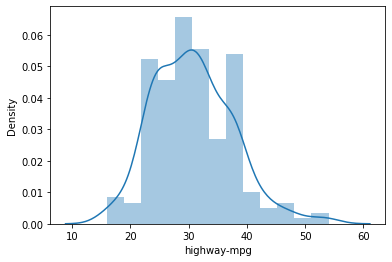

highway-mpg 0.5382939311121927


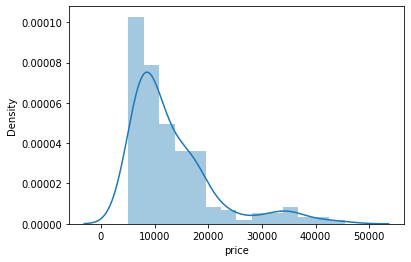

price 1.8116320727324626


In [ ]:
# skewness
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(col, skew(df_num[col]))

In [ ]:
for col in df_num:
  if skew(df_num[col]) >= 0.5 or skew(df_num[col]) <= -0.5:
    df_num[col] = np.sqrt(df_num[col])
    #df_num[col] = np.log(df_num[col]) 

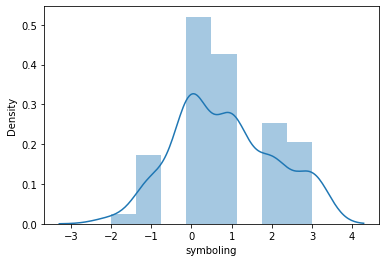

symboling 0.20496147298318457


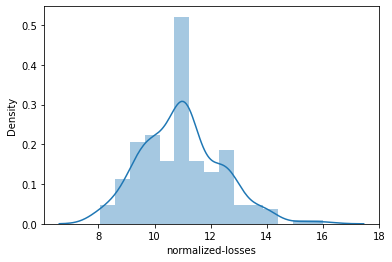

normalized-losses 0.42362644855543496


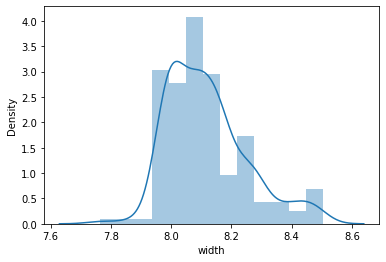

width 0.8493317571169183


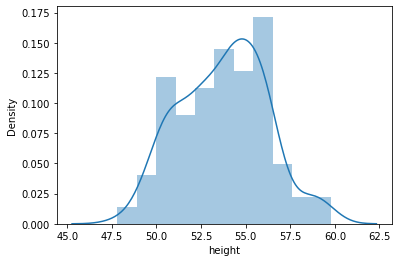

height 0.04840569764935829


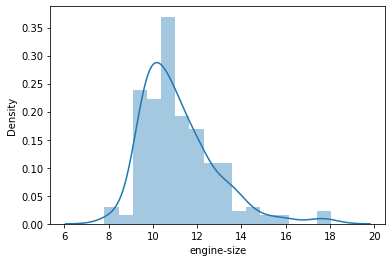

engine-size 1.3632644058819903


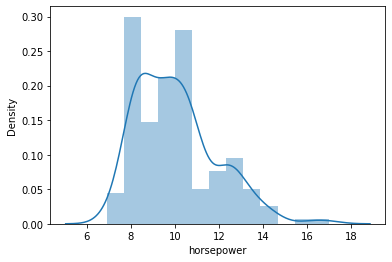

horsepower 0.8921349080564498


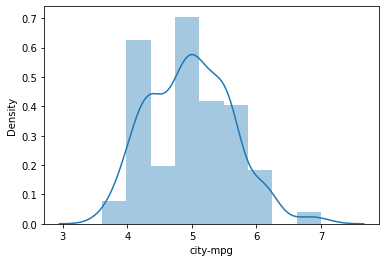

city-mpg 0.30911124417525915


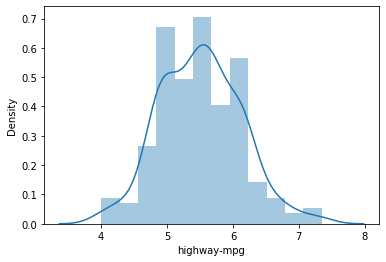

highway-mpg 0.20263954579999355


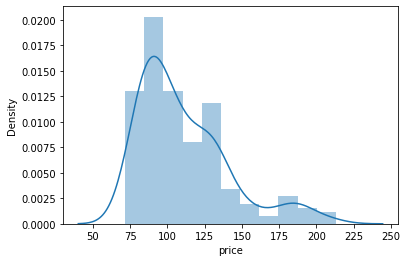

price 1.2243786868913773


In [ ]:
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(col, skew(df_num[col]))

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in df_num:
  mm = MinMaxScaler()
  df_num[col] = mm.fit_transform(df_num[[col]])

In [ ]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.315318
1,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.402113
2,0.6,0.375813,0.444529,0.383333,0.441043,0.545835,0.221935,0.328216,0.402113
3,0.8,0.597650,0.503002,0.541667,0.256711,0.315792,0.381042,0.441164,0.329040
4,0.8,0.597650,0.519651,0.541667,0.375946,0.377959,0.187686,0.206188,0.427875


In [ ]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [ ]:
for col in df_cat:
  print(col)
  print(df_cat[col].value_counts())
  print("-------------------------")

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
saab              6
plymouth          6
porsche           5
isuzu             3
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
-------------------------
fuel-type
gas       183
diesel     20
Name: fuel-type, dtype: int64
-------------------------
body-style
sedan          95
hatchback      69
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
-------------------------
drive-wheels
fwd    119
rwd     75
4wd      9
Name: drive-wheels, dtype: int64
-------------------------
engine-location
front    200
rear       3
Name: engine-location, dtype: int64
-------------------------
engine-type
ohc      146
ohcf      15
ohcv 

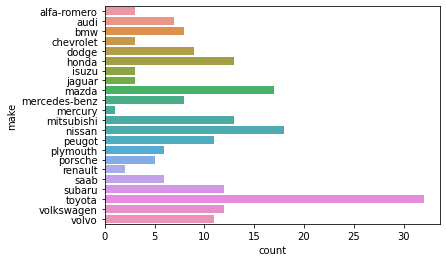

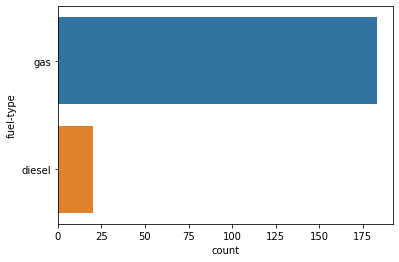

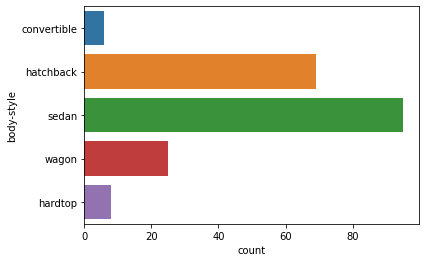

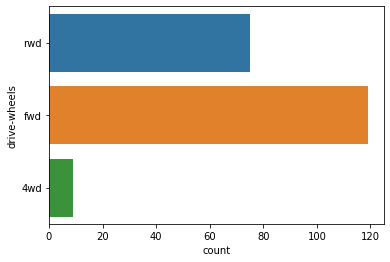

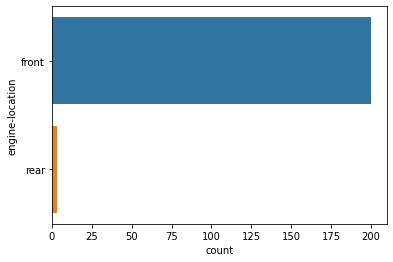

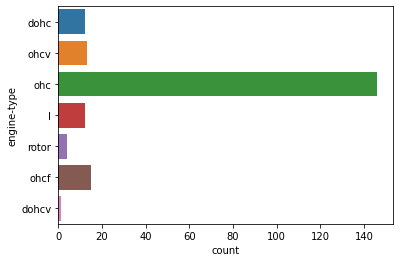

In [ ]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df_cat, y=col)
  plt.show()


In [ ]:
pd.get_dummies(df_cat)

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[[col]])

In [ ]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [ ]:
df_clean = pd.concat([df_num,df_cat], axis=1)

In [ ]:
df_clean.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.315318,0,1,0,2,0,0
1,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.402113,0,1,0,2,0,0
2,0.6,0.375813,0.444529,0.383333,0.441043,0.545835,0.221935,0.328216,0.402113,0,1,2,2,0,5
3,0.8,0.597650,0.503002,0.541667,0.256711,0.315792,0.381042,0.441164,0.329040,1,1,3,1,0,3
4,0.8,0.597650,0.519651,0.541667,0.375946,0.377959,0.187686,0.206188,0.427875,1,1,3,0,0,3


In [ ]:
# Feature engineering
# creating new features from existing one or modifying existing feature

In [ ]:
df_clean["area"] = df_clean["width"] *  df_clean["height"]

In [ ]:
df_clean.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.315318,0,1,0,2,0,0,0.027220
1,1.0,0.375813,0.326639,0.083333,0.350554,0.359223,0.287830,0.357224,0.402113,0,1,0,2,0,0,0.027220
2,0.6,0.375813,0.444529,0.383333,0.441043,0.545835,0.221935,0.328216,0.402113,0,1,2,2,0,5,0.170403
3,0.8,0.597650,0.503002,0.541667,0.256711,0.315792,0.381042,0.441164,0.329040,1,1,3,1,0,3,0.272459
4,0.8,0.597650,0.519651,0.541667,0.375946,0.377959,0.187686,0.206188,0.427875,1,1,3,0,0,3,0.281478


New Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV/gplay.csv")

In [ ]:
df.shape

(10841, 10)

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [ ]:
df.isnull().sum()
#NaN

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [ ]:
df[df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+


In [ ]:
df[df["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [ ]:
df.drop(10472, inplace=True)

In [ ]:
df["Type"].fillna("Free", inplace=True)

In [ ]:
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

In [ ]:
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [ ]:
def remove_dollar(data):
  if "$" in data:
    return float(data[1:])
  else:
    return float(data)

In [ ]:
df["Price"] = df["Price"].apply(remove_dollar)

In [ ]:
def clean_installs(data):
  if "," in data or "+" in data:
    return float(data.replace(",","")[:-1])
  else:
    return float(data)

In [ ]:
df["Installs"] = df["Installs"].apply(clean_installs)

In [ ]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
def clean_size(data):
  if "M" in data:
    return float(data[:-1])
  elif "k" in data:
    return float(data[:-1])/1024
  else:
    return np.nan

In [ ]:
df["Size"] = df["Size"].apply(clean_size)

In [ ]:
df["Size"].fillna(df["Size"].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
dtypes: float64(4), object(5)
memory usage: 846.9+ KB


In [ ]:
df["Reviews"] = df["Reviews"].astype("int")

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone


In [ ]:
df["Rating"].max()

5.0

In [ ]:
df["Rating"].min()

1.0

In [ ]:
df[df["Rating"] == 5]["App"]

329                    Hojiboy Tojiboyev Life Hacks
612                   American Girls Mobile Numbers
615                                    Awake Dating
633                           Spine- The dating app
636      Girls Live Talk - Free Text and Video Chat
                            ...                    
10721                             Mad Dash Fo' Cash
10742                         GKPB FP Online Church
10776                              Monster Ride Pro
10820                               Fr. Daoud Lamei
10837              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 274, dtype: object

In [ ]:
df[df["Rating"] == 1]["App"]

625                               House party - live chat
4127                                    Speech Therapy: F
5151                                        Clarksburg AH
5978                        Truck Driving Test Class 3 BC
6319                     BJ Bridge Standard American 2018
6490                                               MbH BM
7144                                        CB Mobile Biz
7383                                       Thistletown CI
7427                                       CJ DVD Rentals
7806                                          CR Magazine
7926                                 Tech CU Card Manager
8820                                       DS Creator 2.0
8875                                       DT future1 cam
10324                      FE Mechanical Engineering Prep
10400             Familial Hypercholesterolaemia Handbook
10591    Lottery Ticket Checker - Florida Results & Lotto
Name: App, dtype: object

In [ ]:
df["Reviews"].idxmax()

2544

In [ ]:
df.iloc[2544]["App"]

'Facebook'

In [ ]:
df.iloc[df["Price"].idxmax()][["App","Rating"]]

App       I'm Rich - Trump Edition
Rating                         3.6
Name: 4367, dtype: object

In [ ]:
df.iloc[df["Installs"].idxmax(skipna=True)]["App"]

'Google Play Books'

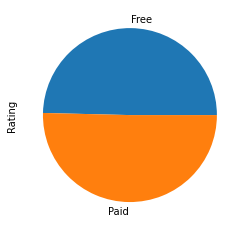

In [ ]:
df.groupby("Type")["Rating"].mean().plot(kind="pie")

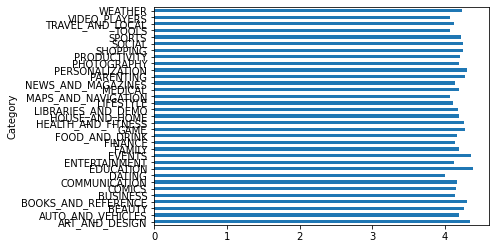

In [ ]:
df.groupby("Category")["Rating"].mean().plot(kind="barh")

Cars Analysis

In [ ]:
cars = pd.read_csv("/content/drive/MyDrive/Sukamal/ML 4-6/cars.csv")

In [ ]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


# Questions



* Which car manufacturer (make) have the expensive car ?
* Which engine-type has highest and lowest average city mileage
* Which body-style has the highest and the lowest average price
* Which make has the highest average highway-mileage
* What is the average price per fuel-type per manufacturer
* What is the average city-mpg per engine per body-style



In [ ]:
cars.iloc[cars["price"].idxmax()]["make"]

'mercedes-benz'

In [ ]:
cars.groupby("engine-type")["city-mpg"].mean().idxmax()

'ohc'

In [ ]:
cars.groupby("engine-type")["city-mpg"].mean().idxmin()

'rotor'

In [ ]:
cars.groupby("engine-type")["city-mpg"].mean()

engine-type
dohc     20.000000
dohcv    17.000000
l        24.500000
ohc      26.804054
ohcf     24.466667
ohcv     16.769231
rotor    16.750000
Name: city-mpg, dtype: float64

In [ ]:
bs_avg_price = cars.groupby("body-style")["price"].mean()

In [ ]:
bs_avg_price.idxmin()

'hatchback'

In [ ]:
bs_avg_price.idxmax()

'hardtop'

In [ ]:
cars.groupby("make")["highway-mpg"].mean().idxmax()

'chevrolet'

In [ ]:
cars.groupby(["make","fuel-type"])["price"].mean()

make           fuel-type
alfa-romero    gas          15498.333333
audi           gas          17022.142857
bmw            gas          26118.750000
chevrolet      gas           6007.000000
dodge          gas           7875.444444
honda          gas           8184.692308
isuzu          gas          12708.250000
jaguar         gas          34600.000000
mazda          diesel       14569.500000
               gas          10130.666667
mercedes-benz  diesel       28394.000000
               gas          38900.000000
mercury        gas          16503.000000
mitsubishi     gas           9239.769231
nissan         diesel        7099.000000
               gas          10610.764706
peugot         diesel       15797.000000
               gas          15232.500000
plymouth       gas           7963.428571
porsche        gas          27520.400000
renault        gas           9595.000000
saab           gas          15223.333333
subaru         gas           8541.250000
toyota         diesel        879

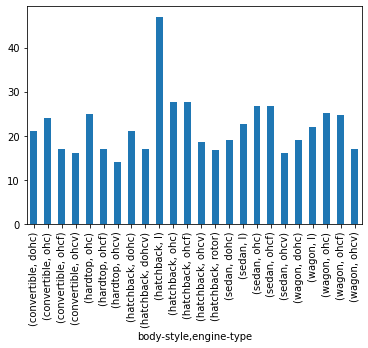

In [ ]:
cars.groupby(["body-style","engine-type"])["city-mpg"].mean().plot(kind="bar")